In [1]:
from platform import python_version

print(python_version())

3.9.16


In [2]:
# hide warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Data Manipulation
import pandas as pd
import numpy as np
import os 
import json 
import gzip
from urllib.request import urlopen
import datetime
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
from collections import Counter

from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


2023-03-24 18:51:33.414802: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
tf.__version__

'2.11.0'

In [5]:
# Define path

path = ''

In [6]:
# Import Files
#/Users/jeannine/Library/CloudStorage/OneDrive-Personal/Documents/WGU/D213 - Advanced Data Analytics/amazon_cells_labelled.txt
amazon = 'amazon_cells_labelled.txt'
a_reviews = pd.read_csv(path + amazon, sep="\t", names=['review', 'sentiment'])
print(a_reviews.shape)

imdb = 'imdb_labelled.txt'
i_reviews = pd.read_csv(path + imdb, sep="\t", names=['review', 'sentiment'])
print(i_reviews.shape)

yelp = 'yelp_labelled.txt'
y_reviews = pd.read_csv(path + yelp, sep="\t", names=['review', 'sentiment'],encoding='ISO-8859-1')
print(y_reviews.shape)

df = pd.concat((y_reviews, i_reviews, a_reviews),ignore_index=True)


(1000, 2)
(748, 2)
(1000, 2)


In [7]:
df.head(10)

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


# Explore data

In [8]:
# get shape of data

df.shape

(2748, 2)

In [9]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [10]:
# Check for nulls

df.isnull().any()

review       False
sentiment    False
dtype: bool

In [11]:
# get column counts and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2748 non-null   object
 1   sentiment  2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


In [12]:
round(df.describe())

,sentiment
count,2748.0
mean,1.0
std,1.0
min,0.0
25%,0.0
50%,1.0
75%,1.0
max,1.0


In [13]:
sentiment_df = df
sentiment_df

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
2743,The screen does get smudged easily because it ...,0
2744,What a piece of junk.. I lose more calls on th...,0
2745,Item Does Not Match Picture.,0
2746,The only thing that disappoint me is the infra...,0


# Transform data

In [14]:
# find any column without any text reviewText == 'none' value

sentiment_df['review'].loc[sentiment_df['review']=='none'].count()

0

In [15]:
# add column that changes all of the words in reviewText to lowercase

sentiment_df['review'] = sentiment_df['review'].str.lower()
sentiment_df.head(10)

,review,sentiment
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
5,now i am getting angry and i want my damn pho.,0
6,honeslty it didn't taste that fresh.),0
7,the potatoes were like rubber and you could te...,0
8,the fries were great too.,1
9,a great touch.,1


In [16]:
# character Review to visualize the presence of characters in the dataset

character_list = sentiment_df['review'].str

list_of_characters = []
for comment in character_list:
    for character in comment:
        if character not in list_of_characters:
            list_of_characters.append(character)
print(list_of_characters)

['w', 'c', 'n', 's', 't', 'h', 'a', 'i', 'd', '-', 'o', 'p', 'm', 'f', 'l', 'g', 'u', '2', 'e', 'b', 'r', 'k', 'y', 'v', '(', 'j', '5', '!', '*', ' ', ')', '1', '&', ';', ':', '.', '$', '#', '[', "'", 'x', ',', '0', '/', '8', 'z', 'q', '4', '"', ']', 'ê', '3', '7', nan, 'é', '9', '?', '\x85', '\t', '\n', '+', '%', '6', '\x96', '\x97', 'å']


In [17]:
# Remove punctuation from reviewText column

sentiment_df['review'] = sentiment_df['review'].str.replace(r'[^\w\s]+', '')

sentiment_df.head(20)

,review,sentiment
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
5,now i am getting angry and i want my damn pho,0
6,honeslty it didnt taste that fresh,0
7,the potatoes were like rubber and you could te...,0
8,the fries were great too,1
9,a great touch,1


In [18]:
# character Review to visualize the presence of characters in the dataset

character_list = sentiment_df['review'].str

list_of_characters = []
for comment in character_list:
    for character in comment:
        if character not in list_of_characters:
            list_of_characters.append(character)
print(list_of_characters)

['w', 'c', 'n', 's', 't', 'h', 'a', 'i', 'd', ' ', 'o', 'p', 'm', 'f', 'l', 'g', 'u', '2', 'e', 'b', 'r', 'k', 'y', 'v', 'j', '5', '1', 'x', '0', '8', 'z', 'q', '4', 'ê', nan, '3', '7', 'é', '9', '\t', '\x85', '\n', '6', 'å']


# Compare datasets df == before lowercase and punctuation is removed and sentiment_df == after lowercase is applied and punctuation removed

In [19]:
# Initial dataset with capital letters and punctuation unchanged 

df['review'][0]

'wow loved this place'

In [20]:
# transformed dataset with all letters in lowercase and punctuation removed

sentiment_df['review'][0]

'wow loved this place'

In [21]:
sentiment_df['sentiment'].value_counts()

1    1386
0    1362
Name: sentiment, dtype: int64

In [22]:
df.shape

(2748, 2)

# Visualize dataset to see frequent words using a word cloud

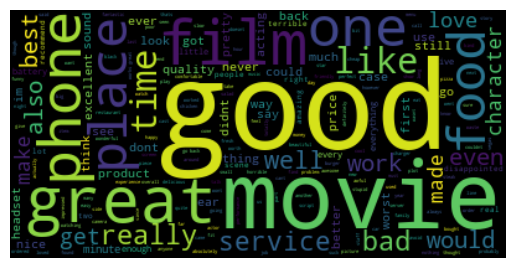

In [23]:
# Eliminate duplicate words

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # to create a Word Cloud
from PIL import Image # Pillow with WordCloud to image manipulation
# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(review for review in sentiment_df['review'])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [24]:
sentiment_df.shape

(2748, 2)

In [25]:
# split df - positive and negative sentiment:
positive = sentiment_df[sentiment_df['sentiment'] == 1]
negative = sentiment_df[sentiment_df['sentiment'] == 0]

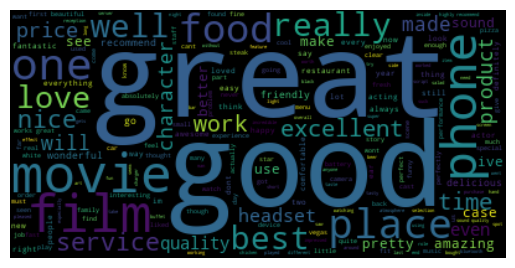

In [26]:
# positive feedback

stopwords = set(STOPWORDS)
#stopwords.update(["br", "href","string","star", 'four', 'five', 'stars','one','strings','good','quality',
#                  'great','guitar','product']) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.review)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud22.png')
plt.show()

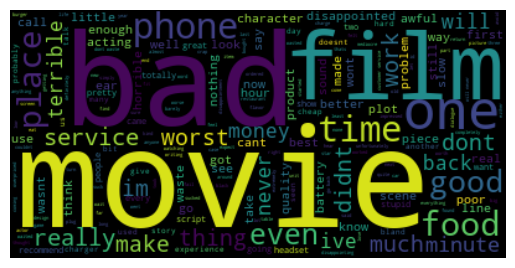

In [27]:
# negative feedback

stopwords = set(STOPWORDS)
#stopwords.update(["br", "href","string","star", 'one', 'two','stars', 'good','guitar','quality','great',
#                  'product']) 
## good and great removed because they were included in negative sentiment
neg = " ".join(review for review in negative.review)
wordcloud2 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud23.png')
plt.show()

# Add column to review word length

In [28]:
sentiment_df['total_words'] = sentiment_df['review'].str.split().str.len()
sentiment_df.head(5)

,review,sentiment,total_words
0,wow loved this place,1,4
1,crust is not good,0,4
2,not tasty and the texture was just nasty,0,8
3,stopped by during the late may bank holiday of...,1,15
4,the selection on the menu was great and so wer...,1,12


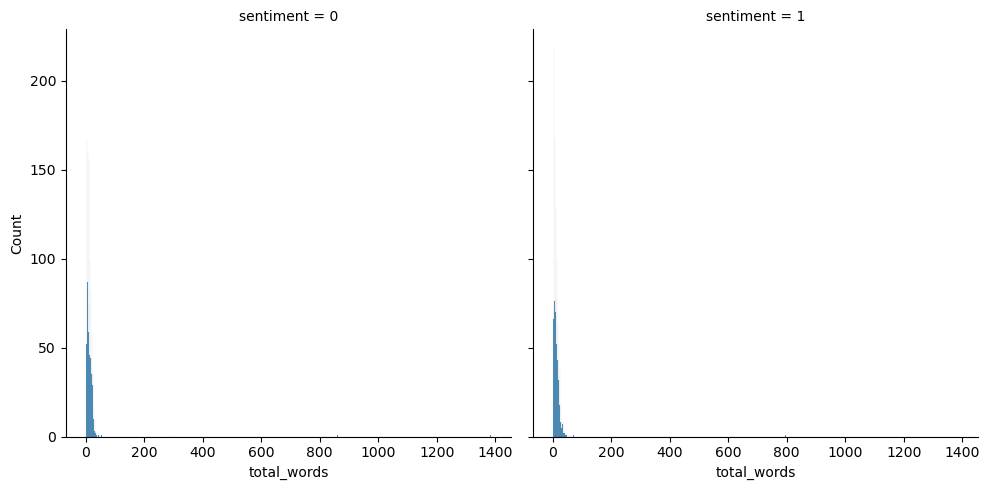

In [29]:
sns.displot(data=sentiment_df, x=sentiment_df['total_words'], col=sentiment_df['sentiment'])
plt.show()

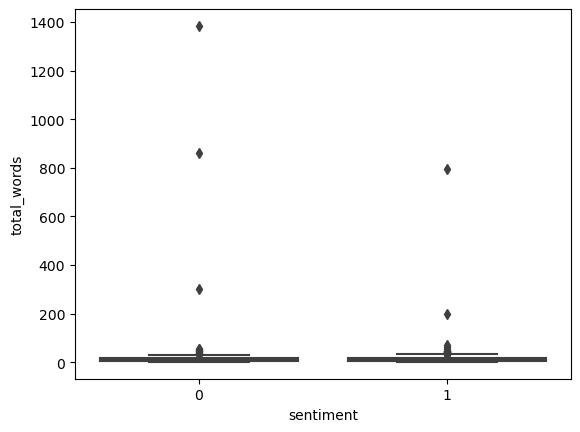

In [30]:
ax = sns.boxplot(x="sentiment", y="total_words", data=sentiment_df)

<Axes: xlabel='sentiment', ylabel='count'>

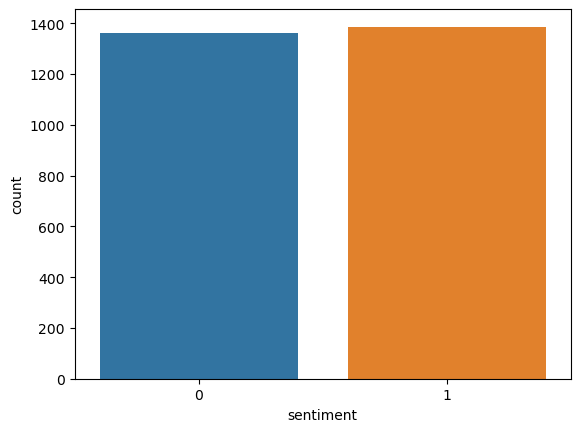

In [31]:
sns.countplot(x='sentiment',data=sentiment_df)

In [32]:
# max reviewText word count --> 5994

sentiment_df[sentiment_df['total_words'] ==sentiment_df['total_words'].max()]

,review,sentiment,total_words
1136,in fact its hard to remember that the part of...,0,1384


In [33]:
print(sentiment_df['review'][1136])

 in fact its hard to remember that the part of ray charles is being acted and not played by the man himself  	1
ray charles is legendary  	1
ray charles life provided excellent biographical material for the film which goes well beyond being just another movie about a musician  	1
hitchcock is a great director  	1
ironically i mostly find his films a total waste of time to watch  	0
secondly hitchcock pretty much perfected the thriller and chase movie  	1
its this pandering to the audience that sabotages most of his films  	0
hence the whole story lacks a certain energy  	0
the plot simply rumbles on like a machine desperately depending on the addition of new scenes  	0
there are the usual hitchcock logic flaws  	0
mishima is extremely uninteresting  	0
this is a chilly unremarkable movie about an author livingworking in a chilly abstruse culture  	0
the flat reenactments dont hold your attention because they are emotionally adrift and stagy  	0
and the rest of it just sits there being 

# Remove stop words

In [ ]:
# Remove stop words plus other words found --> in order to correctly predict, the stop words were required and could not be removed.

#added_stopwords = ['I', 'the', 'like','one', 'im', 'iam']

#stop_words = stopwords.words('english')

#stop_words.extend(added_stopwords)

#sentiment_df['review'] = sentiment_df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
#sentiment_df.head(20)

In [ ]:
# check updated text count with stopword removal

#sentiment_df['review_reduced_length'] = sentiment_df['review_reduced'].str.split().str.len()
#sentiment_df.head(10)

In [ ]:
# updated max word count --> 773

#sentiment_df[sentiment_df['review_length'] ==sentiment_df['review_length'].max()]

In [35]:
# review of length in bins

sentiment_df['total_words_groups'] = pd.qcut(sentiment_df['total_words'],5)
sentiment_df['total_words_groups'].unique()

[(0.999, 5.0], (5.0, 8.0], (12.0, 18.0], (8.0, 12.0], (18.0, 1384.0]]
Categories (5, interval[float64, right]): [(0.999, 5.0] < (5.0, 8.0] < (8.0, 12.0] < (12.0, 18.0] < (18.0, 1384.0]]

In [37]:
sentiment_df[sentiment_df['total_words'] >25]

,review,sentiment,total_words,total_words_groups
28,took an hour to get our food only 4 tables in ...,0,27,"(18.0, 1384.0]"
42,hard to judge whether these sides were good be...,0,28,"(18.0, 1384.0]"
100,our server was fantastic and when he found out...,1,28,"(18.0, 1384.0]"
123,the guys all had steaks and our steak loving s...,1,29,"(18.0, 1384.0]"
126,bland not a liking this place for a number of ...,0,26,"(18.0, 1384.0]"
...,...,...,...,...
2430,this product is clearly not ready for prime ti...,0,27,"(18.0, 1384.0]"
2464,it quit working after id used it for about 18 ...,1,26,"(18.0, 1384.0]"
2545,a good quality bargain i bought this after i b...,1,27,"(18.0, 1384.0]"
2612,but in any case the best part is you can downl...,1,28,"(18.0, 1384.0]"


In [39]:
# Since only 136 rows include values greater than 25 words, I am removing those values from the model.

sentiment_df = sentiment_df[sentiment_df['total_words'] < 26].reset_index()
sentiment_df.shape

(2612, 5)

# Perform Lemmatization

In [40]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
    
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

In [41]:
sentiment_df['review_lem'] = sentiment_df['review'].apply(lemmatize_words)

In [42]:
sentiment_df.head(10)

,index,review,sentiment,total_words,total_words_groups,review_lem
0,0,wow loved this place,1,4,"(0.999, 5.0]",wow love this place
1,1,crust is not good,0,4,"(0.999, 5.0]",crust be not good
2,2,not tasty and the texture was just nasty,0,8,"(5.0, 8.0]",not tasty and the texture be just nasty
3,3,stopped by during the late may bank holiday of...,1,15,"(12.0, 18.0]",stop by during the late may bank holiday off r...
4,4,the selection on the menu was great and so wer...,1,12,"(8.0, 12.0]",the selection on the menu be great and so be t...
5,5,now i am getting angry and i want my damn pho,0,11,"(8.0, 12.0]",now i be get angry and i want my damn pho
6,6,honeslty it didnt taste that fresh,0,6,"(5.0, 8.0]",honeslty it didnt taste that fresh
7,7,the potatoes were like rubber and you could te...,0,22,"(18.0, 1384.0]",the potatoes be like rubber and you could tell...
8,8,the fries were great too,1,5,"(0.999, 5.0]",the fry be great too
9,9,a great touch,1,3,"(0.999, 5.0]",a great touch


In [43]:
# recheck text count after lemmetization

sentiment_df['review_lem_length'] = sentiment_df['review_lem'].str.split().str.len()
sentiment_df.head(10)

,index,review,sentiment,total_words,total_words_groups,review_lem,review_lem_length
0,0,wow loved this place,1,4,"(0.999, 5.0]",wow love this place,4
1,1,crust is not good,0,4,"(0.999, 5.0]",crust be not good,4
2,2,not tasty and the texture was just nasty,0,8,"(5.0, 8.0]",not tasty and the texture be just nasty,8
3,3,stopped by during the late may bank holiday of...,1,15,"(12.0, 18.0]",stop by during the late may bank holiday off r...,15
4,4,the selection on the menu was great and so wer...,1,12,"(8.0, 12.0]",the selection on the menu be great and so be t...,12
5,5,now i am getting angry and i want my damn pho,0,11,"(8.0, 12.0]",now i be get angry and i want my damn pho,11
6,6,honeslty it didnt taste that fresh,0,6,"(5.0, 8.0]",honeslty it didnt taste that fresh,6
7,7,the potatoes were like rubber and you could te...,0,22,"(18.0, 1384.0]",the potatoes be like rubber and you could tell...,22
8,8,the fries were great too,1,5,"(0.999, 5.0]",the fry be great too,5
9,9,a great touch,1,3,"(0.999, 5.0]",a great touch,3


In [44]:
# get updated max reviewText length --> 499

sentiment_df[sentiment_df['review_lem_length'] ==sentiment_df['review_lem_length'].max()]

,index,review,sentiment,total_words,total_words_groups,review_lem,review_lem_length
72,74,i guess i should have known that this place wo...,0,25,"(18.0, 1384.0]",i guess i should have know that this place wou...,25
214,220,the shower area is outside so you can only rin...,0,25,"(18.0, 1384.0]",the shower area be outside so you can only rin...,25
308,316,by this point my friends and i had basically f...,0,25,"(18.0, 1384.0]",by this point my friends and i have basically ...,25
371,379,the staff are now not as friendly the wait tim...,0,25,"(18.0, 1384.0]",the staff be now not as friendly the wait time...,25
396,404,today was my first taste of a buldogis gourmet...,1,25,"(18.0, 1384.0]",today be my first taste of a buldogis gourmet ...,25
522,533,if you love authentic mexican food and want a ...,1,25,"(18.0, 1384.0]",if you love authentic mexican food and want a ...,25
624,637,i was proven dead wrong by this sushi bar not ...,1,25,"(18.0, 1384.0]",i be prove dead wrong by this sushi bar not on...,25
791,807,not a single employee came out to see if we we...,0,25,"(18.0, 1384.0]",not a single employee come out to see if we be...,25
840,857,some may say this buffet is pricey but i think...,1,25,"(18.0, 1384.0]",some may say this buffet be pricey but i think...,25
940,959,the only reason to eat here would be to fill u...,0,25,"(18.0, 1384.0]",the only reason to eat here would be to fill u...,25


In [45]:
sentiment_df.shape

(2612, 7)

In [46]:
sentiment_df

,index,review,sentiment,total_words,total_words_groups,review_lem,review_lem_length
0,0,wow loved this place,1,4,"(0.999, 5.0]",wow love this place,4
1,1,crust is not good,0,4,"(0.999, 5.0]",crust be not good,4
2,2,not tasty and the texture was just nasty,0,8,"(5.0, 8.0]",not tasty and the texture be just nasty,8
3,3,stopped by during the late may bank holiday of...,1,15,"(12.0, 18.0]",stop by during the late may bank holiday off r...,15
4,4,the selection on the menu was great and so wer...,1,12,"(8.0, 12.0]",the selection on the menu be great and so be t...,12
...,...,...,...,...,...,...,...
2607,2743,the screen does get smudged easily because it ...,0,13,"(12.0, 18.0]",the screen do get smudge easily because it tou...,13
2608,2744,what a piece of junk i lose more calls on this...,0,12,"(8.0, 12.0]",what a piece of junk i lose more call on this ...,12
2609,2745,item does not match picture,0,5,"(0.999, 5.0]",item do not match picture,5
2610,2746,the only thing that disappoint me is the infra...,0,12,"(8.0, 12.0]",the only thing that disappoint me be the infra...,12


In [47]:
# Create new reduced dataset with only 2 columns: reviewText_reduced and sentiment

new_sentiment_df = sentiment_df[['review_lem','sentiment']]
new_sentiment_df.head(50)

,review_lem,sentiment
0,wow love this place,1
1,crust be not good,0
2,not tasty and the texture be just nasty,0
3,stop by during the late may bank holiday off r...,1
4,the selection on the menu be great and so be t...,1
5,now i be get angry and i want my damn pho,0
6,honeslty it didnt taste that fresh,0
7,the potatoes be like rubber and you could tell...,0
8,the fry be great too,1
9,a great touch,1


In [48]:
new_sentiment_df['sentiment'].value_counts()

1    1307
0    1305
Name: sentiment, dtype: int64

# Create a word count of most frequent words to see if any others need to be removed and added to stop words

In [49]:
new_sentiment_df['review_lem'].unique()

array(['wow love this place', 'crust be not good',
       'not tasty and the texture be just nasty', ...,
       'item do not match picture',
       'the only thing that disappoint me be the infra red port irda',
       'you can not answer call with the unit never work once'],
      dtype=object)

In [51]:
# Check most common word for each tag

#words = sentiment_df['reviewText_reduced'].str.lower().str.findall("\w+")
words = new_sentiment_df['review_lem'].str.findall("\w+")

unique = set()

for x in words:
    unique.update(x)

In [52]:
#print(unique)

In [55]:
# Join all the title rows and tokenize words

reviews = "".join(new_sentiment_df['review_lem'])

words = word_tokenize(reviews)
    
    

In [56]:
# Count words

word_count = Counter(words)

In [57]:
# Show words

word_count

Counter({'wow': 2,
         'love': 57,
         'this': 351,
         'placecrust': 1,
         'be': 1524,
         'not': 240,
         'goodnot': 1,
         'tasty': 7,
         'and': 874,
         'the': 1117,
         'texture': 3,
         'just': 83,
         'nastystop': 1,
         'by': 42,
         'during': 9,
         'late': 2,
         'may': 10,
         'bank': 1,
         'holiday': 1,
         'off': 21,
         'rick': 1,
         'steve': 1,
         'recommendation': 3,
         'itthe': 17,
         'selection': 7,
         'on': 165,
         'menu': 13,
         'great': 105,
         'so': 125,
         'pricenow': 1,
         'i': 380,
         'get': 109,
         'angry': 1,
         'want': 24,
         'my': 188,
         'damn': 3,
         'phohoneslty': 1,
         'it': 340,
         'didnt': 28,
         'taste': 14,
         'that': 195,
         'freshthe': 2,
         'potatoes': 3,
         'like': 111,
         'rubber': 1,
         'you': 1

In [58]:
# put words in dataframe

word_count_df = pd.DataFrame(word_count.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

word_count_df.head(50)

,word,frequency
4,be,1524
9,the,1117
8,and,874
57,a,633
71,to,519
53,of,427
30,i,380
2,this,351
49,have,346
37,it,340


In [59]:
word_count_df.word.nunique()

5588

# Get vocabulary size

In [61]:
#x = sentiment_df['reviewText_reduced_lem']
x = new_sentiment_df['review_lem'].values
print(len(x))
x[0]

2612


'wow love this place'

In [62]:
# apply tokenizer to column

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
vocab_size = len(tokenizer.word_index)+1
print("Vocabulary size:", vocab_size)

Vocabulary size: 3806


In [63]:
# Embed sequences

encoded_docs = tokenizer.texts_to_sequences(x)


In [64]:
# Apply padding
max_length = 25

x = pad_sequences(encoded_docs, maxlen=max_length)
print(x.shape)


(2612, 25)


In [65]:
print(tokenizer.word_index)

{'be': 1, 'the': 2, 'and': 3, 'i': 4, 'a': 5, 'it': 6, 'to': 7, 'this': 8, 'of': 9, 'have': 10, 'in': 11, 'for': 12, 'not': 13, 'with': 14, 'my': 15, 'very': 16, 'that': 17, 'good': 18, 'great': 19, 'on': 20, 'phone': 21, 'you': 22, 'but': 23, 'so': 24, 'do': 25, 'work': 26, 'as': 27, 'place': 28, 'all': 29, 'food': 30, 'get': 31, 'like': 32, 'film': 33, 'its': 34, 'time': 35, 'go': 36, 'movie': 37, 'service': 38, 'at': 39, 'one': 40, 'just': 41, 'we': 42, 'make': 43, 'really': 44, 'there': 45, 'use': 46, 'if': 47, 'an': 48, 'from': 49, 'they': 50, 'bad': 51, 'back': 52, 'dont': 53, 'would': 54, 'well': 55, 'love': 56, 'out': 57, 'no': 58, 'your': 59, 'here': 60, 'only': 61, 'also': 62, 'ever': 63, 'will': 64, 'best': 65, 'up': 66, 'come': 67, 'or': 68, 'even': 69, 'quality': 70, 'me': 71, 'about': 72, 'see': 73, 'recommend': 74, 'price': 75, 'than': 76, 'ive': 77, 'product': 78, 'think': 79, 'im': 80, 'what': 81, 'say': 82, 'more': 83, 'disappoint': 84, 'sound': 85, 'look': 86, 'nice'

In [67]:
#print(new_sentiment_df['reviewText_reduced_lem'][0])
#print(encoded_docs[0])
print(new_sentiment_df['review_lem'].head())
print(encoded_docs[:5])

0                                  wow love this place
1                                    crust be not good
2              not tasty and the texture be just nasty
3    stop by during the late may bank holiday off r...
4    the selection on the menu be great and so be t...
Name: review_lem, dtype: object
[[523, 56, 8, 28], [1097, 1, 13, 18], [13, 323, 3, 2, 844, 1, 41, 845], [468, 90, 343, 2, 846, 344, 1607, 1608, 135, 1609, 1098, 847, 3, 56, 6], [2, 345, 20, 2, 247, 1, 19, 3, 24, 1, 2, 75]]


# Split data into Train/Test datasets

In [68]:
from sklearn.model_selection import train_test_split

sentences = np.array(x)
y = new_sentiment_df['sentiment'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, 
                                                                    test_size=0.25, 
                                                                    random_state=50)


In [73]:
# Size of x data

print('Training size:', sentences_train.shape)
print('test size:', sentences_test.shape)

Training size: (1959, 25)
test size: (653, 25)


In [112]:
# size of y data

print('Training size:', y_train.shape)
print('test size:', y_test.shape)

Training size: (1959,)
test size: (653,)


In [69]:
np.unique(y)

array([0, 1])

In [70]:
print(y)

[1 0 0 ... 0 0 0]


In [71]:
print(new_sentiment_df.iloc[1])
print(sentences[1])
print(y[1])

review_lem    crust be not good
sentiment                     0
Name: 1, dtype: object
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 1097    1   13   18]
0


In [72]:
print(new_sentiment_df.iloc[56])
print(sentences[56])
print(y[56])

review_lem    the salad have just the right amount of sauce ...
sentiment                                                     1
Name: 56, dtype: object
[   0    0    0    0    0    0    2  249   10   41    2  131 1118    9
  326    7   13  145  716    2 1119  107    1  327  350]
1


In [74]:
sentences_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    4,  116,    2, 1616, 1617,
       1618, 1619, 1620], dtype=int32)

# Send prepared dataset to csv file

In [75]:
# create dataframe for training, test, and validation datasets

df_sentence_train = pd.DataFrame(sentences_train)

df_sentence_test = pd.DataFrame(sentences_test)

df_y_train = pd.DataFrame(y_train)

df_y_test = pd.DataFrame(y_test)

In [76]:
# Export data to CSV

df_sentence_train.to_csv(path + 'padded_sentences_train.csv')

df_sentence_test.to_csv(path + 'padded_sentences_test.csv')
df_y_train.to_csv(path + 'overall_y_train.csv')
df_y_test.to_csv(path + 'overall_y_test.csv')

In [77]:
print(new_sentiment_df.head(2))
print(df_sentence_train.head(2))
print(df_y_train.iloc[0])
#df_y_train[df_y_train[1:]==0]

            review_lem  sentiment
0  wow love this place          1
1    crust be not good          0
   0   1   2   3   4   5   6   7   8   9   ...  15  16  17   18   19    20  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   4  116    2  1616   
1   0   0   0   0   0   0   0   0   0   0  ...   0   4   1   16  223    14   

     21    22    23    24  
0  1617  1618  1619  1620  
1     8    92    49   834  

[2 rows x 25 columns]
0    1
Name: 0, dtype: int64


# Create Model 1 - input layer, LSTM layer (128), sigmoid activation

In [78]:
# Apply layers and methods
embed_size = 25

# Create sequential model

model1 = Sequential()

model1.add(Embedding(vocab_size,
               embed_size,
                    input_shape=(sentences_train.shape[1],)))
# Add an LSTM layer of 25 units
model1.add(LSTM(25, dropout=0.5, recurrent_dropout=0.5))
# Add a Dense output layer
model1.add(Dense(units=1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

2023-03-24 23:07:50.212313: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [79]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 25)            95150     
                                                                 
 lstm (LSTM)                 (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 100,276
Trainable params: 100,276
Non-trainable params: 0
_________________________________________________________________


# Fit Model1

In [80]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)
# Fit the model
history1 = model1.fit(sentences_train, y_train, epochs=5, batch_size=36, callbacks=[early_stopping_monitor], validation_data=(sentences_test,y_test))
history1

Epoch 1/5
55/55 [==============================] - 3s 17ms/step - loss: 0.6905 - accuracy: 0.5753 - val_loss: 0.6832 - val_accuracy: 0.6723
Epoch 2/5
55/55 [==============================] - 1s 13ms/step - loss: 0.6424 - accuracy: 0.6774 - val_loss: 0.5868 - val_accuracy: 0.7580
Epoch 3/5
55/55 [==============================] - 1s 13ms/step - loss: 0.4693 - accuracy: 0.8234 - val_loss: 0.4856 - val_accuracy: 0.7795
Epoch 4/5
55/55 [==============================] - 1s 13ms/step - loss: 0.3067 - accuracy: 0.8974 - val_loss: 0.4641 - val_accuracy: 0.7963
Epoch 5/5
55/55 [==============================] - 1s 12ms/step - loss: 0.2184 - accuracy: 0.9342 - val_loss: 0.5256 - val_accuracy: 0.7734


# Evaluate model1

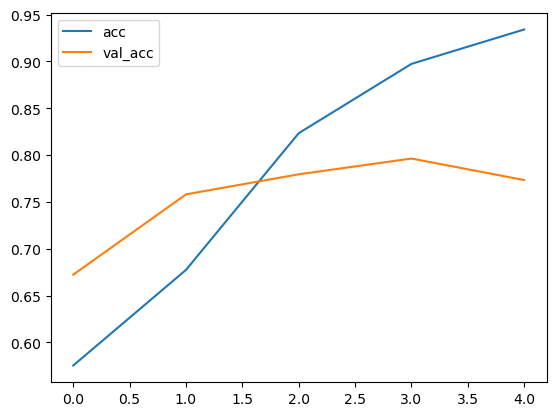

<Figure size 640x480 with 0 Axes>

In [81]:
# plot the model accuracy and loss

plt.plot(history1.history['accuracy'],label='acc')
plt.plot(history1.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy1 plot.jpg")

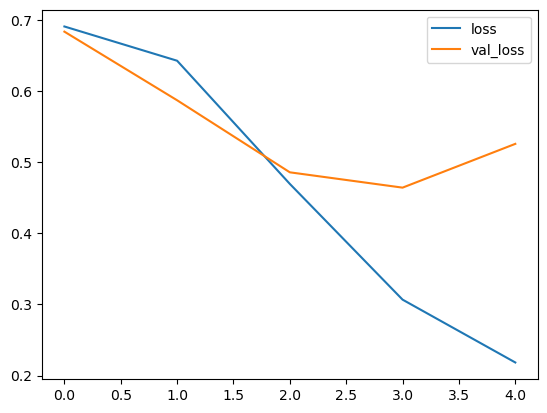

<Figure size 640x480 with 0 Axes>

In [82]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss1 plot.jpg")

In [84]:
# test the model

def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=25)
    prediction = int(model1.predict(tw).round().item())
    print("Predicted label: ", y_test[prediction])

In [85]:
test_sentence1_model1 = "great product!"
predict_sentiment(test_sentence1_model1)

test_sentence2_model1 = "cant stay intune minute terrible beginners"
predict_sentiment(test_sentence2_model1)

1/1 [==============================] - 0s 208ms/step
Predicted label:  1
1/1 [==============================] - 0s 21ms/step
Predicted label:  0


# Model 2 - Input layer, LSTM layer, Dense layer --> Increase nodes in LSTM layer and add relu activation function

In [86]:
# Create Sequential model 
model2 = Sequential()
# add embedding layer
model2.add(Embedding(vocab_size, embed_size, input_shape=(sentences_train.shape[1],)))
# Add an LSTM layer of 128 units
model2.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5, activation='relu'))
# Add a Dense output layer
model2.add(Dense(units=1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [87]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 25)            95150     
                                                                 
 lstm_1 (LSTM)               (None, 128)               78848     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 174,127
Trainable params: 174,127
Non-trainable params: 0
_________________________________________________________________


# Fit model2

In [88]:
# Model2 softmax activation

#from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)
# Fit the model
history2 = model2.fit(sentences_train, y_train, epochs=5, batch_size=36, callbacks=[early_stopping_monitor], validation_data=(sentences_test,y_test))
history2

Epoch 1/5
55/55 [==============================] - 4s 33ms/step - loss: 0.6929 - accuracy: 0.4987 - val_loss: 0.6911 - val_accuracy: 0.6309
Epoch 2/5
55/55 [==============================] - 2s 29ms/step - loss: 0.6677 - accuracy: 0.6279 - val_loss: 0.6301 - val_accuracy: 0.7121
Epoch 3/5
55/55 [==============================] - 1s 27ms/step - loss: 0.6184 - accuracy: 0.7407 - val_loss: 0.6251 - val_accuracy: 0.6907
Epoch 4/5
55/55 [==============================] - 2s 28ms/step - loss: 0.5160 - accuracy: 0.8234 - val_loss: 0.5702 - val_accuracy: 0.7305
Epoch 5/5
55/55 [==============================] - 2s 35ms/step - loss: 0.4959 - accuracy: 0.8714 - val_loss: 0.5607 - val_accuracy: 0.7810


# Evaluate model2

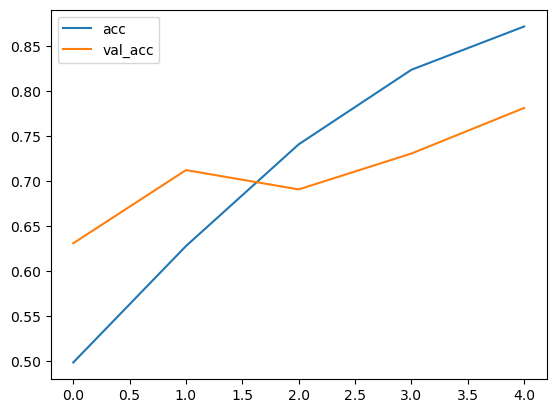

<Figure size 640x480 with 0 Axes>

In [89]:
# plot the model accuracy and loss

plt.plot(history2.history['accuracy'],label='acc')
plt.plot(history2.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy2 plot.jpg")

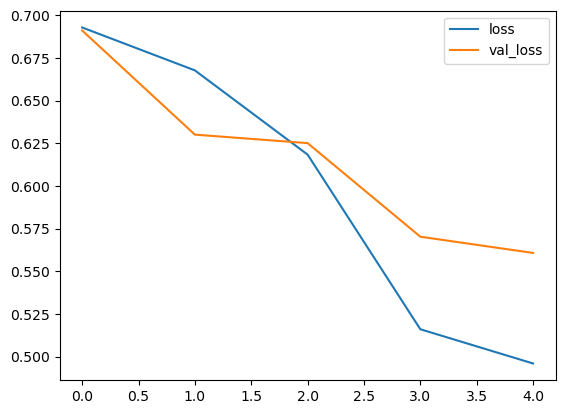

<Figure size 640x480 with 0 Axes>

In [90]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss2 plot.jpg")

In [116]:
# test the model

def predict_sentiment2(text):
    tw2 = tokenizer.texts_to_sequences([text])
    tw2 = pad_sequences(tw2,maxlen=25)
    prediction2 = int(model2.predict(tw2).round().item())
    print("Predicted label: ", y_test[prediction2])

In [117]:
test_sentence1_model2 = "I really love it!"
predict_sentiment2(test_sentence1_model2)

test_sentence2_model2 = "It is a waste of money"
predict_sentiment2(test_sentence2_model2)

1/1 [==============================] - 0s 99ms/step
Predicted label:  1
1/1 [==============================] - 0s 40ms/step
Predicted label:  0


# Model 3 - change LSTM to 34

In [93]:
# Create Sequential model 
model3 = Sequential()
# add embedding layer
model3.add(Embedding(vocab_size, embed_size, input_shape=(sentences_train.shape[1],)))
# Add an LSTM layer of 34 units
model3.add(LSTM(256, dropout=0.5, recurrent_dropout=0.5))
# Add a Dense output layer
model3.add(Dense(units=1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [94]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 25, 25)            95150     
                                                                 
 lstm_2 (LSTM)               (None, 256)               288768    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 384,175
Trainable params: 384,175
Non-trainable params: 0
_________________________________________________________________


# Fit model3

In [95]:
# Model3 softmax activation

#from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)
# Fit the model
history3 = model3.fit(sentences_train, y_train, epochs=5, batch_size=32, callbacks=[early_stopping_monitor], validation_data=(sentences_test,y_test))
history3

Epoch 1/5
62/62 [==============================] - 7s 76ms/step - loss: 0.6914 - accuracy: 0.5176 - val_loss: 0.6839 - val_accuracy: 0.6386
Epoch 2/5
62/62 [==============================] - 4s 65ms/step - loss: 0.6190 - accuracy: 0.7080 - val_loss: 0.5873 - val_accuracy: 0.7259
Epoch 3/5
62/62 [==============================] - 4s 66ms/step - loss: 0.4416 - accuracy: 0.8091 - val_loss: 0.5288 - val_accuracy: 0.7397
Epoch 4/5
62/62 [==============================] - 4s 70ms/step - loss: 0.3426 - accuracy: 0.8606 - val_loss: 0.5066 - val_accuracy: 0.7534
Epoch 5/5
62/62 [==============================] - 4s 67ms/step - loss: 0.2375 - accuracy: 0.9255 - val_loss: 0.4729 - val_accuracy: 0.7948


# Evaluate model3

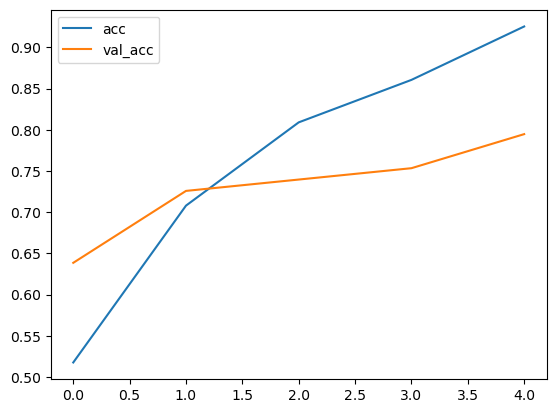

<Figure size 640x480 with 0 Axes>

In [96]:
# plot the model accuracy and loss

plt.plot(history3.history['accuracy'],label='acc')
plt.plot(history3.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy3 plot.jpg")

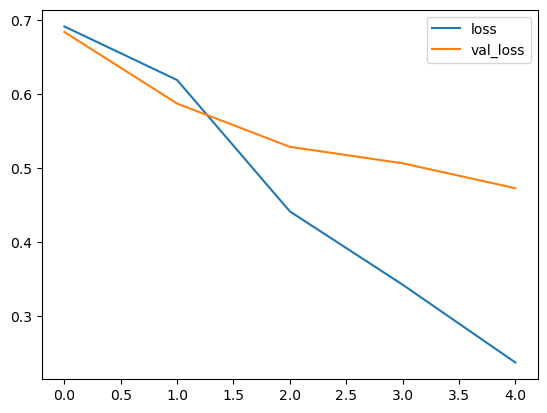

<Figure size 640x480 with 0 Axes>

In [97]:
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss3 plot.jpg")

In [98]:
# test the model

def predict_sentiment3(text):
    tw3 = tokenizer.texts_to_sequences([text])
    tw3 = pad_sequences(tw3,maxlen=25)
    prediction3 = int(model3.predict(tw3).round().item())
    print("Predicted label: ", y_test[prediction3])

In [99]:
test_sentence1_model3 = "I really like it"
predict_sentiment3(test_sentence1_model3)

test_sentence2_model3 = "It is a waste of money"
predict_sentiment3(test_sentence2_model3)

1/1 [==============================] - 0s 189ms/step
Predicted label:  1
1/1 [==============================] - 0s 24ms/step
Predicted label:  0


# Model 4 - input layer, LSTM layer (50) , Dense Layer

In [100]:
# Create Sequential model 
model4 = Sequential()
# add embedding layer
model4.add(Embedding(vocab_size, embed_size, input_shape=(sentences_train.shape[1],)))
# Add an LSTM layer of 50 units
model4.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5, activation='relu'))
# Add a Dense output layer
model4.add(Dense(units=1, activation='sigmoid'))
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [101]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 25, 25)            95150     
                                                                 
 lstm_3 (LSTM)               (None, 50)                15200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 110,401
Trainable params: 110,401
Non-trainable params: 0
_________________________________________________________________


In [102]:
#from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)
# Fit the model
history4 = model4.fit(sentences_train, y_train, epochs=5, batch_size=36, callbacks=[early_stopping_monitor], validation_data=(sentences_test,y_test))
history4

Epoch 1/5
55/55 [==============================] - 3s 19ms/step - loss: 0.6925 - accuracy: 0.5237 - val_loss: 0.6906 - val_accuracy: 0.6018
Epoch 2/5
55/55 [==============================] - 1s 15ms/step - loss: 0.6733 - accuracy: 0.6662 - val_loss: 0.6220 - val_accuracy: 0.6325
Epoch 3/5
55/55 [==============================] - 1s 14ms/step - loss: 0.5554 - accuracy: 0.7723 - val_loss: 0.5557 - val_accuracy: 0.7734
Epoch 4/5
55/55 [==============================] - 1s 15ms/step - loss: 0.4436 - accuracy: 0.8693 - val_loss: 0.5286 - val_accuracy: 0.7887
Epoch 5/5
55/55 [==============================] - 1s 15ms/step - loss: 0.3353 - accuracy: 0.9081 - val_loss: 9.4155 - val_accuracy: 0.8070


# Evaluate model4

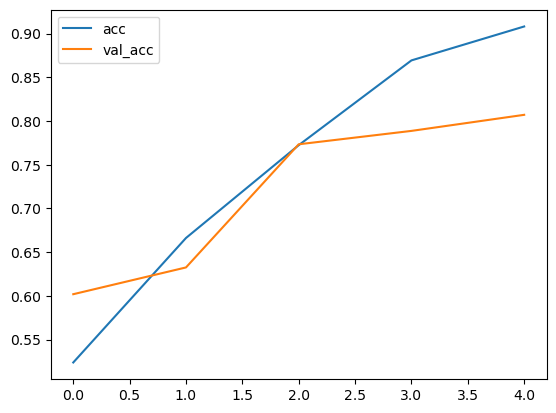

<Figure size 640x480 with 0 Axes>

In [103]:
# plot the model accuracy and loss

plt.plot(history4.history['accuracy'],label='acc')
plt.plot(history4.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy4 plot.jpg")

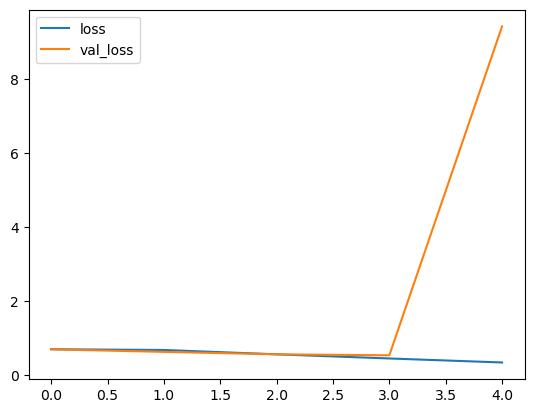

<Figure size 640x480 with 0 Axes>

In [104]:
plt.plot(history4.history['loss'], label='loss')
plt.plot(history4.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss4 plot.jpg")

In [105]:
# test the model

def predict_sentiment4(text):
    tw4 = tokenizer.texts_to_sequences([text])
    tw4 = pad_sequences(tw4,maxlen=25)
    prediction4 = int(model4.predict(tw4).round().item())
    print("Predicted label: ", y_test[prediction4])

In [106]:
test_sentence1_model4 = "It was beautiful"
predict_sentiment2(test_sentence1_model4)

test_sentence2_model4 = "It is a waste of money"
predict_sentiment2(test_sentence2_model4)

1/1 [==============================] - 0s 19ms/step
Predicted label:  1
1/1 [==============================] - 0s 18ms/step
Predicted label:  0


# Save the model

In [113]:
# Save the model

model2.save('Trained_Model.keras')